In [1]:
%matplotlib inline

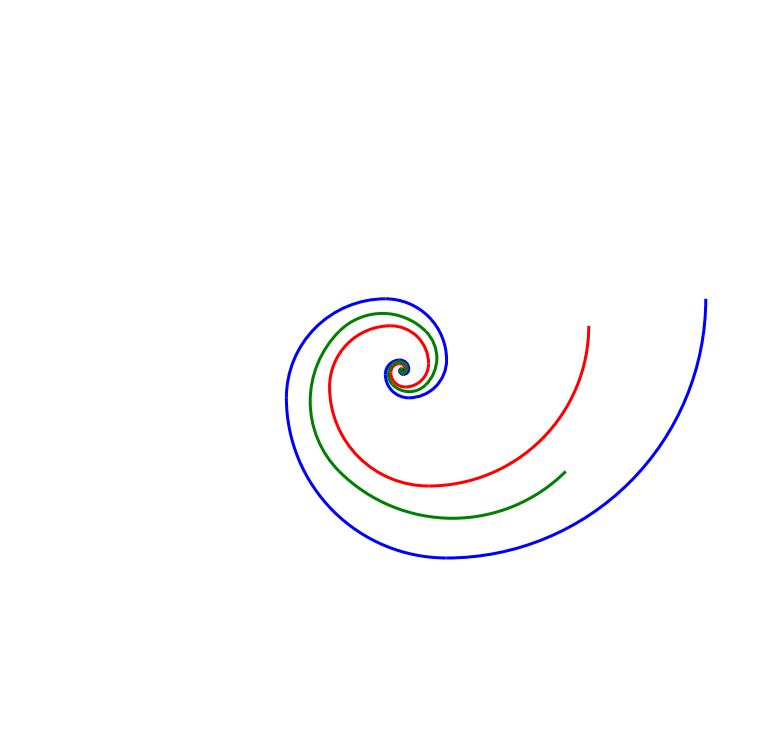

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def fibseries(a, b, n):
    yield (a, b)
    for i in range(n):
        c = a + b
        yield (b, c)
        a = b
        b = c

def fibcurve(start, centroid, fibs, direction):
    rotation = np.array([[0, -1], [1, 0]])
    a, b = start
    s = np.array(start)
    c = np.array(centroid)
    for f, g in fibs:
        v1 = s - c
        theta = np.arctan2(v1[1], v1[0]) / np.pi * 180
        
        # (centroid, radius, theta)
        yield (c, f, theta)

        s = np.dot(rotation, v1) + c
        v2 = c - s
        c = g * v2 / np.linalg.norm(v2) + s

fig = plt.figure(figsize=(10, 10), frameon=False)
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], aspect='equal')
ax.set_axis_off()
ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)

for c, r, t in fibcurve((0, 1), (0, 0), fibseries(1, 1, 10), 0):
    ax.add_patch(Arc((c[0], c[1]), 2 * r, 2 * r,
                 theta1=t, theta2=t+90.0, edgecolor='r', lw=3))
    
for c, r, t in fibcurve((1, 0), (0, 0), fibseries(1, 1, 11), 0):
    ax.add_patch(Arc((c[0], c[1]), 2 * r, 2 * r,
                 theta1=t, theta2=t+90.0, edgecolor='b', lw=3))

for c, r, t in fibcurve((np.sqrt(2)/2, np.sqrt(2)/2), (0, 0), fibseries(1, 1, 10), 0):
    ax.add_patch(Arc((c[0], c[1]), 2 * r, 2 * r,
                 theta1=t, theta2=t+90.0, edgecolor='g', lw=3))

plt.plot()
fig.savefig('myimage.svg', format='svg', dpi=1200)